In [1]:
import torch
import sys
sys.path.append('..')
sys.path.append('../..')
from utils import *
from model import *
from data import *
import numpy as np
import matplotlib.pyplot as plt

# exp_dir = '/home/zhiqin/data/LLM_new/refine_adam_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_composition_task_34_unseen_43_unseen_diff_ini_0.8_test_eps_1e-08_wd_0.01_beta2_0.999'
# working_dir = f'{exp_dir}/composition-N_900000-2L1H_seed1'



working_dir = f'/home/zhiqin/data/LLM/LLM_pami/LLM_init_exact/refine_adam_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_diff_lr_1e-5_composition_task_34_unseen_43_unseen_diff_ini_0.5_test_eps_1e-08_wd_0.01_beta2_0.999/composition-N_900000-2L1H_seed1'
state_dict=torch.load(f'{working_dir}/model/model_209.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = load_args(f'{working_dir}/config.json')

# model = myGPT(args, device)
model = myGPT_specific_test_for_resnet_test_for_dill_loc(args, device)
model.load_state_dict(state_dict)
model.to(device)

myGPT_specific_test_for_resnet_test_for_dill_loc(
  (embedding): Embedding(
    (tgt_emb): Embedding(201, 400)
    (pos_emb): Embedding(20, 400)
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0-1): 2 x DecoderLayer(
        (dec_self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=400, out_features=200, bias=False)
          (W_K): Linear(in_features=400, out_features=200, bias=False)
          (W_V): Linear(in_features=400, out_features=200, bias=False)
          (fc): Linear(in_features=200, out_features=400, bias=False)
          (layernorm): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
        )
        (pos_ffn): PoswiseFeedForwardNet(
          (fc): Sequential(
            (0): Linear(in_features=400, out_features=1200, bias=False)
            (1): ReLU()
            (2): Linear(in_features=1200, out_features=400, bias=False)
          )
          (layernorm): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
  )
  

In [2]:
data=np.load('/home/zhiqin/data/LLM/LLM_pami/LLM_init_exact/refine_adam_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_long_train_diff_lr_1e-5_composition_task_34_unseen_43_unseen_diff_ini_0.2_test_eps_1e-08_wd_0.01_beta2_0.999/composition-N_100000-2L1H_seed1/data/datas.npz')


In [3]:
dname = ['12_xm0', '13_xm0', '14_xm0', '23_xm0', '24_xm0', '34_xm0'] + ['21_xm0', '31_xm0', '41_xm0', '32_xm0', '42_xm0', '43_xm0']

output_dict={}
out_all=[]
value=np.array([1,2,3,4])



    
for name in dname:
    output=[]
    i_w=0
    for i in (data[name]):
        match_indices = np.where(np.isin(np.array(i), value))[0][0]
        if match_indices==2:
            dec_input = torch.tensor(i[:9], dtype=torch.long, device='cuda').unsqueeze(0)
            vec=model(dec_input, match_indices-1)[0][0, -1, :].detach().cpu().numpy()
            output.append(vec)
            out_all.append(vec)
            i_w+=1
        if i_w==50:
            break
        
    output_dict[name]=output
    
    


In [4]:
out_all=np.array(out_all)
out_all.shape

(600, 201)

In [5]:
import pandas as pd
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
setup_seed(5)

tsne = TSNE(n_components=2, perplexity=12)
X = tsne.fit_transform(out_all)

<Figure size 512x384 with 0 Axes>

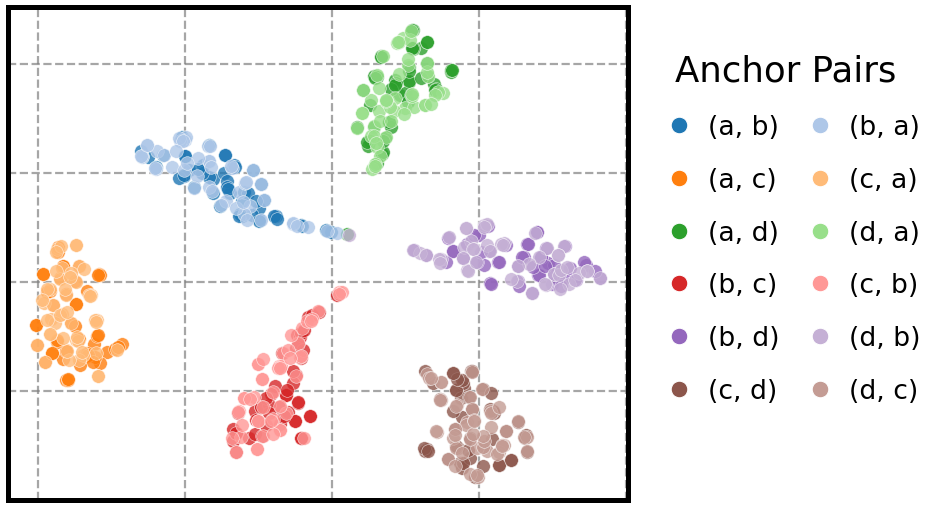

In [25]:
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94'
]

anchor_lst=['(a, b)', '(a, c)', '(a, d)', '(b, c)', '(b, d)', '(c, d)', '(b, a)', '(c, a)', '(d, a)', '(c, b)', '(d, b)', '(d, c)']

format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=32, lw=6, ms=12.5, axlw=4.5, major_tick_len=0)
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_axisbelow(True)
for ind, i in enumerate(X):
    plt.scatter(i[0], i[1], c=colors[ind // 50], s=150, alpha=0.8, edgecolors='w', linewidth=0.5)

plt.xticks([-60,-30,0,30,60])
plt.yticks([-60,-30,0,30,60])
plt.xticks(ticks=plt.gca().get_xticks(), labels=[''] * len(plt.gca().get_xticks()))
plt.yticks(ticks=plt.gca().get_yticks(), labels=[''] * len(plt.gca().get_yticks()))


plt.grid(color='gray', linestyle='--', linewidth=2, alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=15) for i in range(len(colors))]
labels = [f'{i}' for i in anchor_lst]
plt.legend(handles, labels, title="Anchor Pairs", loc="center left", 
           fontsize=24, title_fontsize='32', bbox_to_anchor=(1, 0.55), ncol=2, columnspacing=0.5, labelspacing=1.0, handletextpad=0.1)

plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/tsne_0.5.png', bbox_inches='tight', dpi=300)
